## Input the Parameters of the Starlette-SLR GEODYN run:

In [1]:
import pandas as pd
import numpy as np

In [14]:
%load_ext autoreload
%autoreload 2


##################################
# INPUT PARAMETERS:
##################################
sat_file = 'starlette'
arc = '030914_2wk'
grav_id ='goco05s' 
local_path = '/data/analysis/starlette_analysis/'
SAT_ID = 7501001
accel_card = 'accelon'


##################################
# PATH TO DENSITY MODEL RUN of Choice:
##################################

msis86_model = 'msis86'
path_to_msis86 = '/data/runs_geodyn/st/results/'+ grav_id+'_'+msis86_model+ '_' +accel_card+'/'

msis2_model = 'msis2'
path_to_msis2 = '/data/runs_geodyn/st/results/'+ grav_id+'_'+msis2_model+ '_' +accel_card+'/'




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
ls ../../runs_geodyn/st/results/goco05s_msis2_accelon/


all_outputs/  EMAT/    IISSET/    orbits/  RESIDS/  TELEM/
DENSITY/      IIEOUT/  KEP_TRAJ/  PUNCH/   sumry/   XYZ_TRAJ/


### Call the prep-function that loads the data

This may take a few minutes to load.

#### MSIS86

In [17]:
import sys  
sys.path.insert(0, '/data/analysis/util_funcs/py_geodynreader_slr/')

from a_ReadStarlette import ReadStarlette

# AdjustedParams, Trajectory, Density, Resids = ReadStarlette(arc, 
#                                                            sat_file,
#                                                            grav_id, 
#                                                            local_path, 
#                                                            path_to_msis86,
#                                                            True)
AdjustedParams, Trajectory, Density, Resids = ReadStarlette(arc, 
                                                           sat_file,
                                                           grav_id, 
                                                           local_path, 
                                                           path_to_msis2,
                                                           True)

The base file name for this arc is: st030914_2wk.goco05s 

File exists: iieout 
        /data/runs_geodyn/st/results/goco05s_msis2_accelon/IIEOUT/st030914_2wk.goco05s
File exists: ascii_xyz 
        /data/runs_geodyn/st/results/goco05s_msis2_accelon/XYZ_TRAJ/st030914_2wk.goco05s
File exists: densityfil 
        /data/runs_geodyn/st/results/goco05s_msis2_accelon/DENSITY/st030914_2wk.goco05s

 Loading data... 

Parameter adjustment data loaded
Trajectory data loaded
Density data loaded
Residual data loaded


# Plot Drag Coefficients

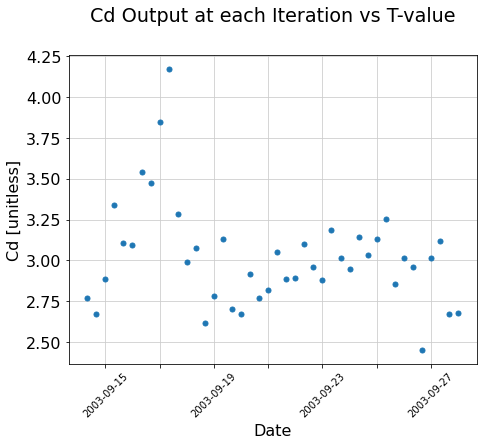

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
from matplotlib import patches as mpatches
mpl.rcParams['lines.markersize'] = 10
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'

color86 = 'tab:blue'
color71 = 'tab:red'
color87 = 'tab:green'

# which_cd = 'T20'
last_iter = 5
which_stat = 'CURRENT_VALUE' # 2 is the current val

labels = list(AdjustedParams[5]['0CD'].keys())
val_list = []
for i in AdjustedParams[last_iter]['0CD'].keys():
    val_list.append(AdjustedParams[last_iter]['0CD'][i][which_stat])


fig, ( ax1) = plt.subplots(1, figsize=(7,6), sharex=False)
#     print(i)
ax1.set_title('Cd Output at each Iteration vs T-value', y=1.1)
ax1.plot(labels, val_list,'.', color = color86)


ax1.set(ylabel=  'Cd [unitless]')  
ax1.set(xlabel=  'Date')  
ax1.get_xticklabels()[1::2]
fig.tight_layout( pad=1.0)

n=2
for index, label in enumerate(ax1.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)
ax1.tick_params(axis='x', which='major', labelsize=10)
#     ax1.tick_params(axis='both', which='minor', labelsize=8)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)



# Plot Density along the orbit:

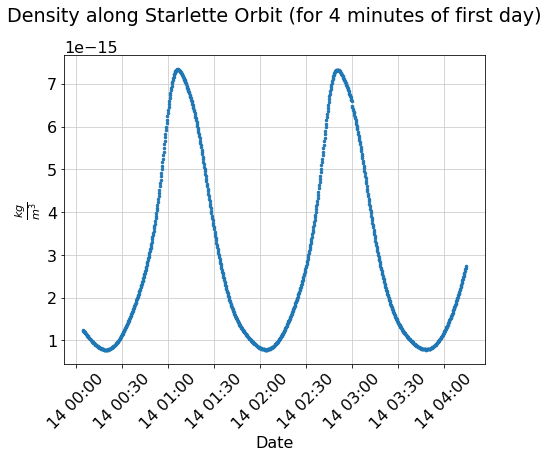

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
from matplotlib import patches as mpatches
mpl.rcParams['lines.markersize'] = 5
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'



color86 = 'tab:blue'
color71 = 'tab:red'
color87 = 'tab:green'

data_nums = 1000

fig, ( ax1) = plt.subplots(1, figsize=(7,6), sharex=False)
ax1.set_title('Density along Starlette Orbit (for 4 minutes of first day)', y=1.1)
ax1.plot(Density['Date'][:data_nums], Density['rho (kg/m**3)'][:data_nums],'.', color = color86, label = 'MSIS 86')


ax1.set(ylabel=  r'$\frac{kg}{m^3}$')  
ax1.set(xlabel=  'Date')  

# fig.axes[0].legend(label)

fig.tight_layout( pad=1.0)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)



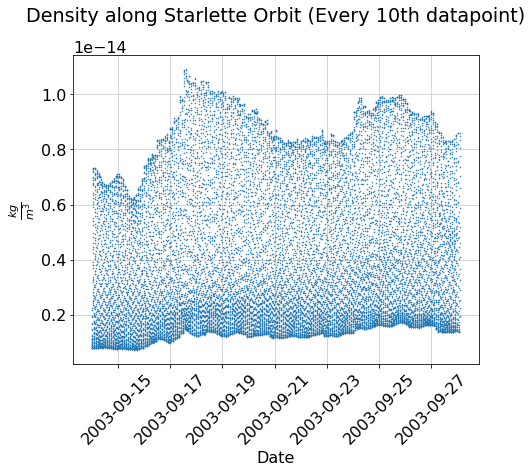

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
from matplotlib import patches as mpatches
mpl.rcParams['lines.markersize'] = 1
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'



color86 = 'tab:blue'
color71 = 'tab:red'
color87 = 'tab:green'

data_nums = 10

fig, ( ax1) = plt.subplots(1, figsize=(7,6), sharex=False)
ax1.set_title('Density along Starlette Orbit (Every 10th datapoint)', y=1.1)
ax1.plot(Density['Date'][::data_nums], Density['rho (kg/m**3)'][::data_nums],'.', color = color86, label = 'MSIS 86')


ax1.set(ylabel=  r'$\frac{kg}{m^3}$')  
ax1.set(xlabel=  'Date')  

# fig.axes[0].legend(label)

fig.tight_layout( pad=1.0)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)



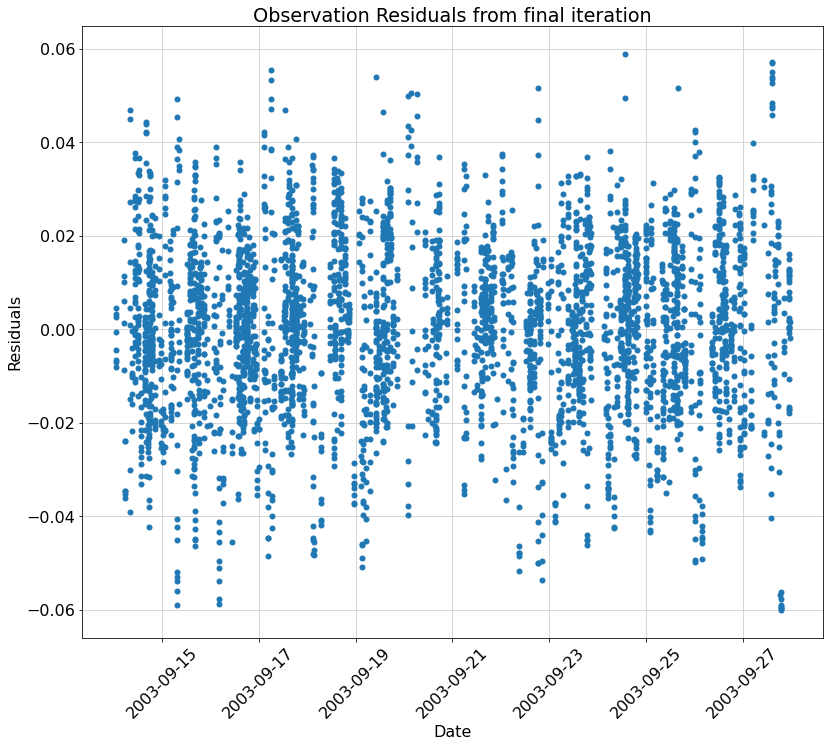

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
from matplotlib import patches as mpatches
mpl.rcParams['lines.markersize'] = 10
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'


fig, ( ax1) = plt.subplots(1, figsize=(12,10), sharex=False)
ax1.set_title('Observation Residuals from final iteration')
ax1.plot(pd.to_datetime(Resids['Date']), Resids['Residual'].values.astype(float) ,'.', )
ax1.set(ylabel=  'Residuals')  
ax1.set(xlabel=  'Date')  


fig.tight_layout( pad=1.5)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)



# Plot Trajectory

In [22]:
Trajectory[SAT_ID]

,YYMMDD,HHMM,SECONDS,X,Y,Z,XDOT,YDOT,ZDOT,LAT,LONG,HEIGHT,timeHHMM,year,month,day,hours,minutes,secs,Date
2,30914,105,55.205719,-3902733.45,5158963.35,-3130061.01,-5675.94600,-1433.45007,4725.70967,-25.954786,118.024110,812276.80,0105,2003,09,14,01,05,55,2003-09-14 01:05:55
3,30914,106,15.005953,-4014288.93,5129496.49,-3035836.71,-5591.75463,-1542.86306,4791.45070,-25.120244,118.880387,811968.94,0106,2003,09,14,01,06,15,2003-09-14 01:06:15
4,30914,106,47.006428,-4190987.23,5077312.08,-2880862.22,-5450.70994,-1718.31837,4893.42230,-23.758977,120.237767,811607.96,0106,2003,09,14,01,06,47,2003-09-14 01:06:47
5,30914,107,13.806875,-4335433.06,5029307.46,-2748618.90,-5327.95617,-1863.82657,4974.68198,-22.607839,121.350810,811436.43,0107,2003,09,14,01,07,13,2003-09-14 01:07:13
6,30914,107,47.207484,-4510756.72,4964053.31,-2580843.48,-5169.22701,-2043.14534,5070.56124,-21.160247,122.709737,811390.75,0107,2003,09,14,01,07,47,2003-09-14 01:07:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4256,30927,2306,16.255334,-2033010.72,-6382156.91,3221677.03,4261.27986,-3778.22061,-4526.81415,25.815780,259.442972,1058543.17,2306,2003,09,27,23,06,16,2003-09-27 23:06:16
4257,30927,2306,46.009636,-1905364.24,-6491817.86,3085617.06,4318.12948,-3592.39056,-4618.07677,24.641083,260.630636,1061628.80,2306,2003,09,27,23,06,46,2003-09-27 23:06:46
4258,30927,2307,14.113752,-1783293.27,-6590281.37,2954662.91,4368.35902,-3414.25056,-4700.52615,23.522023,261.728993,1064467.48,2307,2003,09,27,23,07,14,2003-09-27 23:07:14
4259,30927,2307,46.618555,-1640412.97,-6697872.24,2800384.91,4422.21449,-3205.22971,-4791.27084,22.217107,262.972764,1067656.78,2307,2003,09,27,23,07,46,2003-09-27 23:07:46


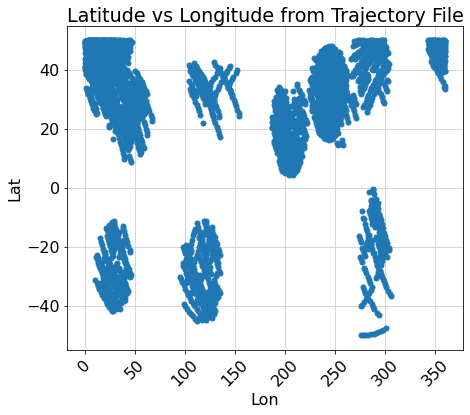

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
from matplotlib import patches as mpatches
mpl.rcParams['lines.markersize'] = 10
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'

datapoint = -1
fig, ( ax1) = plt.subplots(1, figsize=(7,6), sharex=False)
ax1.set_title('Latitude vs Longitude from Trajectory File')
ax1.plot(Trajectory[SAT_ID]['LONG'].astype(float)[:datapoint], Trajectory[SAT_ID]['LAT'].astype(float)[:datapoint],'.', )
ax1.set(ylabel=  'Lat')  
ax1.set(xlabel=  'Lon')  

# ax1.set(xlabel=  'Date')  


fig.tight_layout( pad=1.5)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)



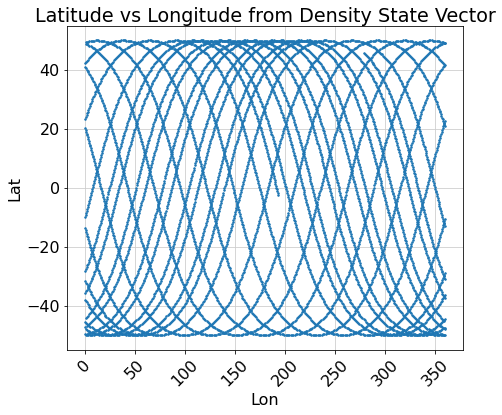

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
from matplotlib import patches as mpatches
mpl.rcParams['lines.markersize'] = 3
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'

datapoint = 8000
fig, ( ax1) = plt.subplots(1, figsize=(7,6), sharex=False)
ax1.set_title('Latitude vs Longitude from Density State Vector')
ax1.plot(Density['Lon'].astype(float)[:datapoint], Density['Lat'].astype(float)[:datapoint],'.', )
ax1.set(ylabel=  'Lat')  
ax1.set(xlabel=  'Lon')  

# ax1.set(xlabel=  'Date')  


fig.tight_layout( pad=1.5)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)



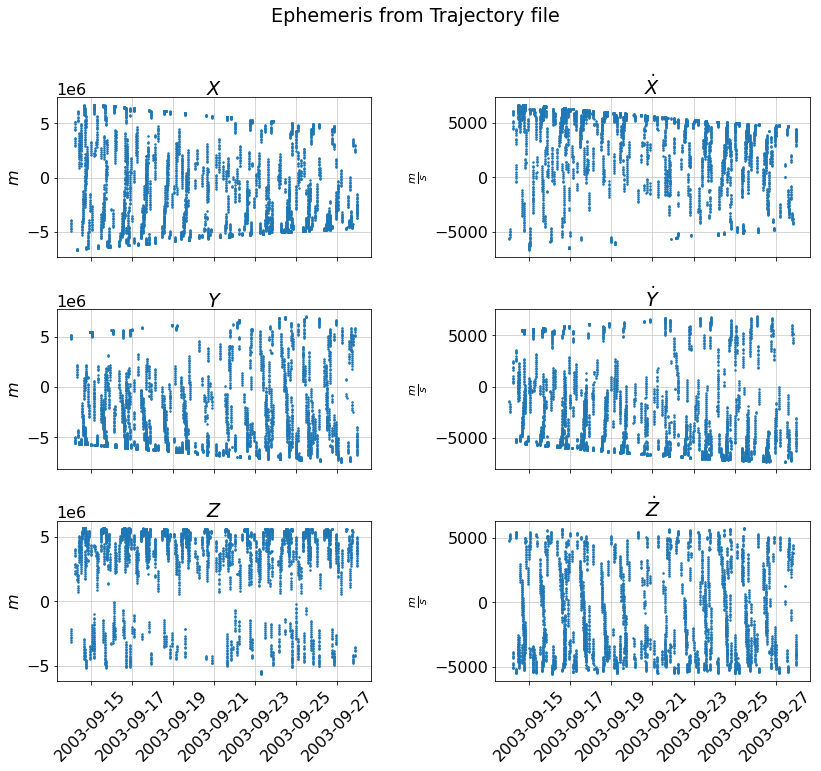

In [25]:
fig, ( axs) = plt.subplots(3,2, figsize=(12,10), sharex=True)


fig.suptitle('Ephemeris from Trajectory file', y=1.0)
axs[0,0].set_title(r'$X$' )
axs[0,0].plot(Trajectory[SAT_ID]['Date'], Trajectory[SAT_ID]['X'].values.astype(float),'.',  )
axs[0,0].set(ylabel=  r'$m$') 

axs[1,0].set_title(r'$Y$' )
axs[1,0].plot(Trajectory[SAT_ID]['Date'], Trajectory[SAT_ID]['Y'].values.astype(float),'.',  )
axs[1,0].set(ylabel=  r'$m$') 

axs[2,0].set_title(r'$Z$' )
axs[2,0].plot(Trajectory[SAT_ID]['Date'], Trajectory[SAT_ID]['Z'].values.astype(float),'.',  )
axs[2,0].set(ylabel=  r'$m$') 

axs[0,1].set_title(r'$\dot{X}$' )
axs[0,1].plot(Trajectory[SAT_ID]['Date'], Trajectory[SAT_ID]['XDOT'].values.astype(float),'.',  )
axs[0,1].set(ylabel=  r'$\frac{m}{s}$') 

axs[1,1].set_title(r'$\dot{Y}$' )
axs[1,1].plot(Trajectory[SAT_ID]['Date'], Trajectory[SAT_ID]['YDOT'].values.astype(float),'.',  )
axs[1,1].set(ylabel=  r'$\frac{m}{s}$') 

axs[2,1].set_title(r'$\dot{Z}$' )
axs[2,1].plot(Trajectory[SAT_ID]['Date'], Trajectory[SAT_ID]['ZDOT'].values.astype(float),'.',  )
axs[2,1].set(ylabel=  r'$\frac{m}{s}$') 

# import matplotlib.dates as mdates
# myFmt = mdates.DateFormatter('%m/%d')

fig.tight_layout( pad=1.5)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
#     locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
#     formatter = mdates.ConciseDateFormatter(locator)
#     ax.xaxis.set_major_locator(locator)
#     ax.xaxis.set_major_formatter(formatter)
# # handles, labels = axs[1,1].get_legend_handles_labels()
# axs[1,1].legend(handles[::-1], labels[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 2 )


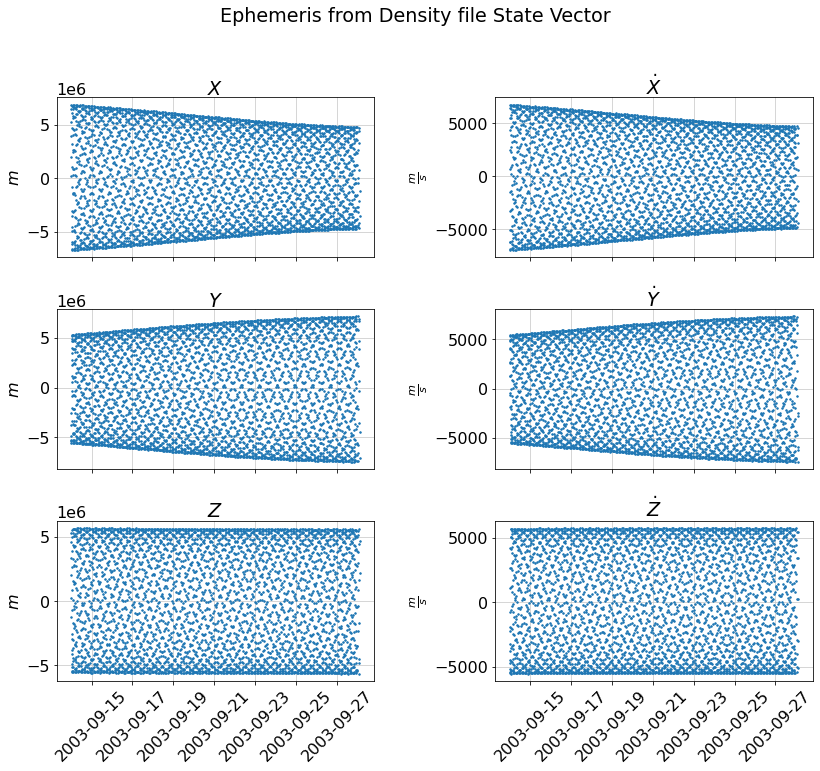

In [26]:
fig, ( axs) = plt.subplots(3,2, figsize=(12,10), sharex=True)


fig.suptitle('Ephemeris from Density file State Vector', y=1.0)
axs[0,0].set_title(r'$X$' )
axs[0,0].plot(Density['Date'][::40], Density['X'].astype(float)[::40],'.',  )
axs[0,0].set(ylabel=  r'$m$') 

axs[1,0].set_title(r'$Y$' )
axs[1,0].plot(Density['Date'][::40], Density['Y'].astype(float)[::40],'.',  )
axs[1,0].set(ylabel=  r'$m$')

axs[2,0].set_title(r'$Z$' )
axs[2,0].plot(Density['Date'][::40], Density['Z'].astype(float)[::40],'.',  )
axs[2,0].set(ylabel=  r'$m$') 

axs[0,1].set_title(r'$\dot{X}$' )
axs[0,1].plot(Density['Date'][::40], Density['XDOT'].astype(float)[::40],'.',  )
axs[0,1].set(ylabel=  r'$\frac{m}{s}$') 

axs[1,1].set_title(r'$\dot{Y}$' )
axs[1,1].plot(Density['Date'][::40], Density['YDOT'].astype(float)[::40],'.',  )
axs[1,1].set(ylabel=  r'$\frac{m}{s}$') 

axs[2,1].set_title(r'$\dot{Z}$' )
axs[2,1].plot(Density['Date'][::40], Density['ZDOT'].astype(float)[::40],'.',  )
axs[2,1].set(ylabel=  r'$\frac{m}{s}$') 

# import matplotlib.dates as mdates
# myFmt = mdates.DateFormatter('%m/%d')

fig.tight_layout( pad=1.5)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
#     locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
#     formatter = mdates.ConciseDateFormatter(locator)
#     ax.xaxis.set_major_locator(locator)
#     ax.xaxis.set_major_formatter(formatter)
# # handles, labels = axs[1,1].get_legend_handles_labels()
# axs[1,1].legend(handles[::-1], labels[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 2 )
